## LR多类分类

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross- entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.)


1. Andrew Ng的Machine Learning课中提出的是one vs rest的方式。如果有K类，相当于要训练K个binary classifier。
1. 另外一种就是输出层使用softmax。


### 逻辑回归，二分类

![logistic_regression](http://images.slideplayer.com/39/10973405/slides/slide_19.jpg)

### softmax regression 多类分类

其实与LR挺像的，只是学习过程中，W不再是vector了，b不再是scalar了。softmax中，如果是K类分类，W是K * vector，b是K * 1。

![softmax_regression](https://www.tensorflow.org/versions/r1.1/images/softmax-regression-scalargraph.png)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

### 数据

In [2]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=43)

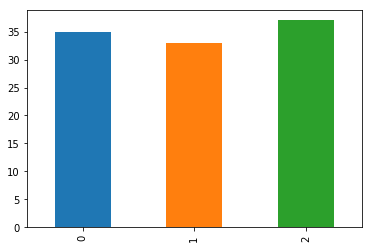

In [3]:
# train样本分类分布
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')

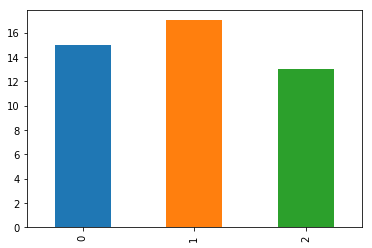

In [4]:
# test样本分类分布
pd.Series(y_test).value_counts().sort_index().plot(kind='bar')

### helper function

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### LR

In [6]:
# 默认L2正则化
# multi_class = {‘ovr’, ‘multinomial’}
# multinomial -> softmax

# clf = LogisticRegression()

# Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.
clf = LogisticRegression(multi_class="multinomial", solver="sag") 

In [7]:
# train on training set

clf.fit(X_train, y_train)

/Users/jiahua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

### 训练错误率，bias

评估手段：

1. accuracy
1. [Rec] classification report (precision, recall, f1)
1. [Rec] confusion matrix
1. decision boundary TODO? 2D???

In [8]:
y_pred = clf.predict(X_train)

Confusion matrix, without normalization
[[35  0  0]
 [ 0 31  2]
 [ 0  0 37]]


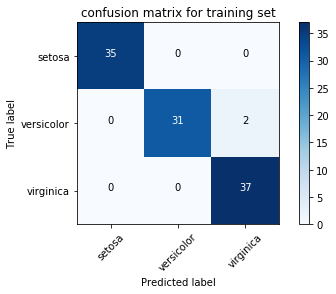

In [9]:
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, title='confusion matrix for training set')

In [10]:
accuracy_score(y_true=y_train, y_pred=y_pred)

0.9809523809523809

In [11]:
print(classification_report(y_true=y_train, y_pred=y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      0.94      0.97        33
          2       0.95      1.00      0.97        37

avg / total       0.98      0.98      0.98       105



### 测试错误率，泛化能力 variance

In [12]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]


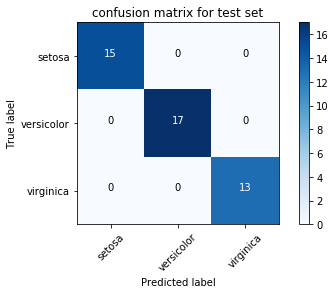

In [13]:
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, title='confusion matrix for test set')

In [14]:
accuracy_score(y_true=y_test, y_pred=y_pred)

1.0

In [15]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        17
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

